# EDA and Imputing Missing values

In [558]:
import pandas as pd
applicant_df = pd.read_csv('applicant.csv')
loan_df = pd.read_csv('loan.csv')

In [559]:
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [560]:
applicant_df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

In [561]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [562]:
loan_df.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

In [563]:
print(loan_df.applicant_id.value_counts()[:3])
print(applicant_df.applicant_id.value_counts()[:3])

applicant_id
1469590    1
1554792    1
1439887    1
Name: count, dtype: int64
applicant_id
1469590    1
1554792    1
1439887    1
Name: count, dtype: int64


- Hence, the column applicant_id is the primary key in both the tables. We can use this columnn to merge two tables.

high_risk_applicant
0    700
1    300
Name: count, dtype: int64


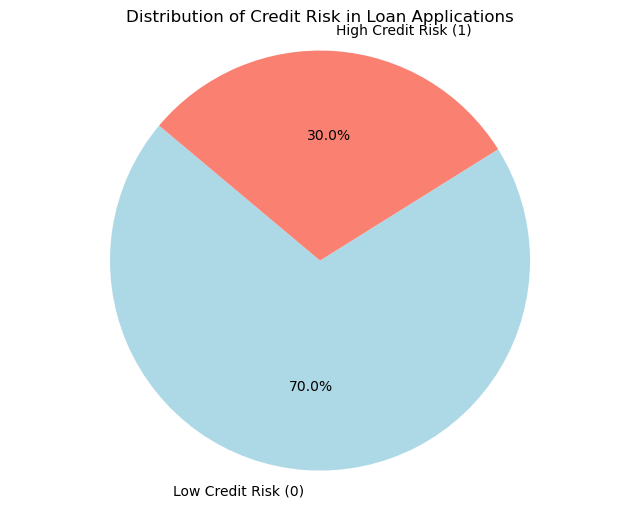

In [564]:
import matplotlib.pyplot as plt

# Get value counts of the high_risk_application column
risk_counts = loan_df['high_risk_applicant'].value_counts()
print(risk_counts)

# Define labels
labels = ['Low Credit Risk (0)', 'High Credit Risk (1)']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Distribution of Credit Risk in Loan Applications')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [565]:
print(loan_df.shape, " is the shape of loan data-frame")
print(applicant_df.shape, " is the shape of applicant data-frame")

(1000, 13)  is the shape of loan data-frame
(1000, 15)  is the shape of applicant data-frame


### Combining Two datasets

In [566]:
merged_df = pd.merge(applicant_df, loan_df, on='applicant_id', how='inner')
merged_df.shape

(1000, 27)

In [567]:
for col in merged_df.columns:
    print(col)

applicant_id
Primary_applicant_age_in_years
Gender
Marital_status
Number_of_dependents
Housing
Years_at_current_residence
Employment_status
Has_been_employed_for_at_least
Has_been_employed_for_at_most
Telephone
Foreign_worker
Savings_account_balance
Balance_in_existing_bank_account_(lower_limit_of_bucket)
Balance_in_existing_bank_account_(upper_limit_of_bucket)
loan_application_id
Months_loan_taken_for
Purpose
Principal_loan_amount
EMI_rate_in_percentage_of_disposable_income
Property
Has_coapplicant
Has_guarantor
Other_EMI_plans
Number_of_existing_loans_at_this_bank
Loan_history
high_risk_applicant


- Number_of_existing_loans_at_this_bank

This feature directly refers to the number of loans the applicant already has at the bank, which gives insight into how many credit accounts or loans the person currently holds. A higher value would indicate that the person has more credit accounts.

##### if you have counts of applicants, you want to see them as whole numbers, which is why fmt='d' is used.
##### 'Blues' is a predefined colormap in Seaborn and Matplotlib that uses different shades of blue.

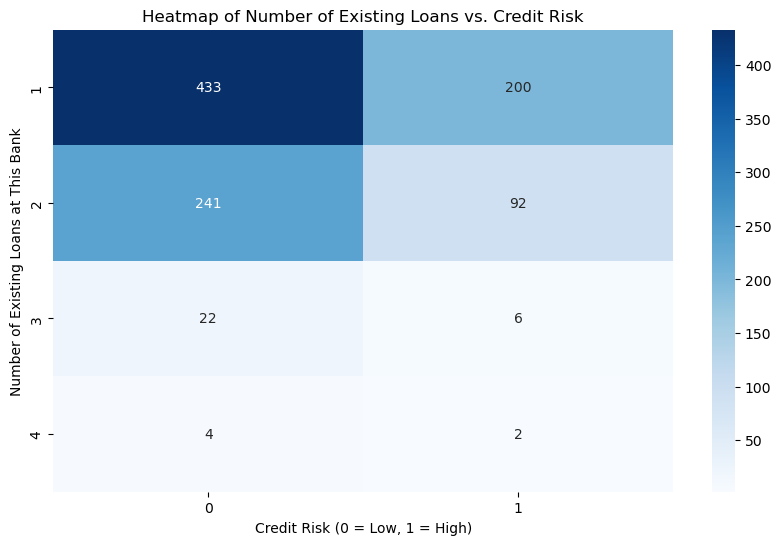

In [568]:
import seaborn as sns

# Create a pivot table between 'Number_of_existing_loans_at_this_bank' and 'high_risk_applicant'
pivot_table = pd.pivot_table(merged_df, 
                             values='applicant_id',  # Assuming 'applicant_id' is a unique count for each row
                             index='Number_of_existing_loans_at_this_bank', 
                             columns='high_risk_applicant', 
                             aggfunc='count', 
                             fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Number of Existing Loans vs. Credit Risk')
plt.xlabel('Credit Risk (0 = Low, 1 = High)')
plt.ylabel('Number of Existing Loans at This Bank')
plt.show()


In [569]:
merged_df.isnull().sum().sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

- The top 5 columns in above are having more then 20% missing values, so we can't use them in analysis.

In [570]:
# List of columns to drop
columns_to_drop = [
    'Other_EMI_plans',
    'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
    'Telephone',
    'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
    'Has_been_employed_for_at_most',
    'Savings_account_balance'
]

# Drop the columns from merged_df inplace
merged_df.drop(columns=columns_to_drop, inplace=True)

In [571]:
merged_df.nunique()

applicant_id                                   1000
Primary_applicant_age_in_years                   53
Gender                                            2
Marital_status                                    4
Number_of_dependents                              2
Housing                                           3
Years_at_current_residence                        4
Employment_status                                 4
Has_been_employed_for_at_least                    4
Foreign_worker                                    2
loan_application_id                            1000
Months_loan_taken_for                            33
Purpose                                           9
Principal_loan_amount                           921
EMI_rate_in_percentage_of_disposable_income       4
Property                                          3
Has_coapplicant                                   2
Has_guarantor                                     2
Number_of_existing_loans_at_this_bank             4
Loan_history

In [572]:
set(merged_df['Purpose'])

{'FF&E',
 'business',
 'career development',
 'domestic appliances',
 'education',
 'electronic equipment',
 nan,
 'new vehicle',
 'repair costs',
 'used vehicle'}

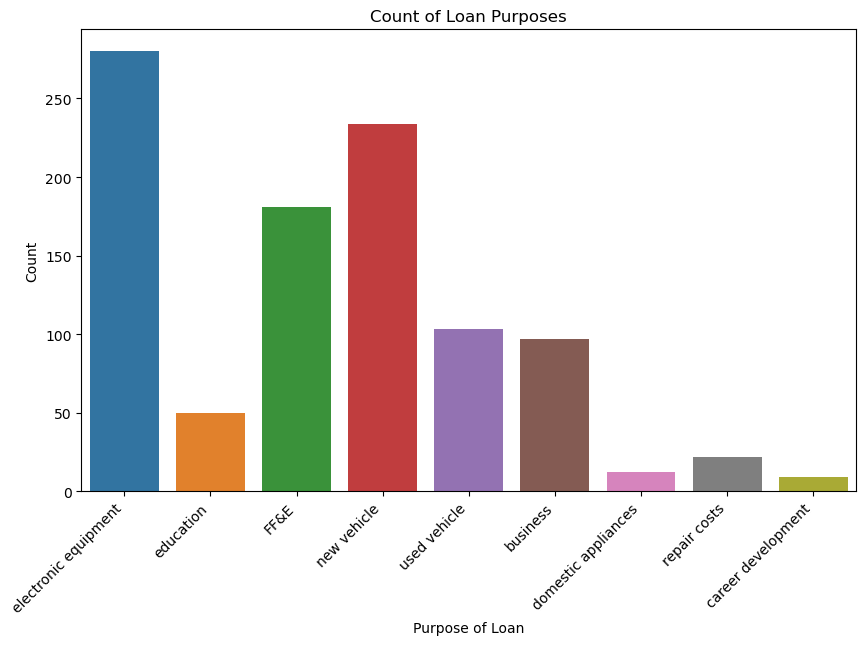

In [573]:
plt.figure(figsize=(10, 6))

# Create a countplot for the 'Purpose' column
sns.countplot(x='Purpose', data=merged_df)

# Set the title and labels
plt.title('Count of Loan Purposes')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [574]:
columns_with_missing_values = [
    'Property', 
    'Has_been_employed_for_at_least',
    'Purpose'
    ]

# all above are catagorical columns

In [575]:
merged_df.dtypes

applicant_id                                    int64
Primary_applicant_age_in_years                  int64
Gender                                         object
Marital_status                                 object
Number_of_dependents                            int64
Housing                                        object
Years_at_current_residence                      int64
Employment_status                              object
Has_been_employed_for_at_least                 object
Foreign_worker                                  int64
loan_application_id                            object
Months_loan_taken_for                           int64
Purpose                                        object
Principal_loan_amount                           int64
EMI_rate_in_percentage_of_disposable_income     int64
Property                                       object
Has_coapplicant                                 int64
Has_guarantor                                   int64
Number_of_existing_loans_at_

In [576]:
merged_df['loan_application_id'][:5]

0    d68d975e-edad-11ea-8761-1d6f9c1ff461
1    d68d989e-edad-11ea-b1d5-2bcf65006448
2    d68d995c-edad-11ea-814a-1b6716782575
3    d68d99fc-edad-11ea-8841-17e8848060ae
4    d68d9a92-edad-11ea-9f3d-1f8682db006a
Name: loan_application_id, dtype: object

In [577]:
merged_df.drop(columns=['loan_application_id'], inplace=True)

In [578]:
merged_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,1,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,1,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,1,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,1,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1


In [579]:
merged_df[columns_with_missing_values].isnull().sum()

Property                          154
Has_been_employed_for_at_least     62
Purpose                            12
dtype: int64

In [580]:
# Create a dictionary to store indexes of missing values for each column
missing_value_indexes = {col: merged_df[merged_df[col].isnull()].index.tolist() for col in columns_with_missing_values}

In [581]:
# Display the result
missing_value_indexes['Purpose']

[72, 83, 105, 287, 310, 374, 431, 442, 594, 665, 818, 915]

In [582]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
# List of categorical columns
categorical_columns = [
    'Gender', 
    'Marital_status',
    'Housing',
    'Employment_status', 
    'Has_been_employed_for_at_least', 
    'Foreign_worker', 
    'Purpose',
    'Property',
    'Loan_history',
]

# Initialize the label encoder
label_encoder = LabelEncoder()

label_dict = {}

# Encode categorical columns without filling NaN values
for column in categorical_columns:
    # Fit and transform only the non-null values
    non_null_values = merged_df[column].dropna().astype(str)
    label_encoder.fit(non_null_values)
    
    # Create a mapping from original values to labels
    label_dict[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    
    # Transform the column, keeping NaN values intact
    merged_df[column] = merged_df[column].astype(str).where(merged_df[column].notnull(), other=np.nan)
    
    # Reassign the transformed values back into the original DataFrame
    merged_df.loc[merged_df[column].notnull(), column] = label_encoder.transform(merged_df[column].dropna())

merged_df[categorical_columns].head()

,Gender,Marital_status,Housing,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Purpose,Property,Loan_history
0,1,3,1,1,3,1,5,2,1
1,0,1,1,1,1,1,5,2,3
2,1,3,1,3,2,1,4,2,1
3,1,3,0,1,2,1,0,0,3
4,1,3,0,1,1,1,6,NaN,2


In [583]:
merged_df[columns_with_missing_values].isnull().sum()

Property                          154
Has_been_employed_for_at_least     62
Purpose                            12
dtype: int64

In [584]:
# Create a dictionary to store indexes of missing values for each column
missing_value_indexes_after_encoding = {col: merged_df[merged_df[col].isnull()].index.tolist() for col in columns_with_missing_values}

In [585]:
for col in columns_with_missing_values:
    print(missing_value_indexes_after_encoding[col] == missing_value_indexes[col])

True
True
True


- Apply KNN imputer

In [586]:
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation
merged_df_imputed = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)

In [587]:
merged_df_imputed[columns_with_missing_values].isnull().sum()

Property                          0
Has_been_employed_for_at_least    0
Purpose                           0
dtype: int64

In [588]:
len(merged_df_imputed.columns)

20

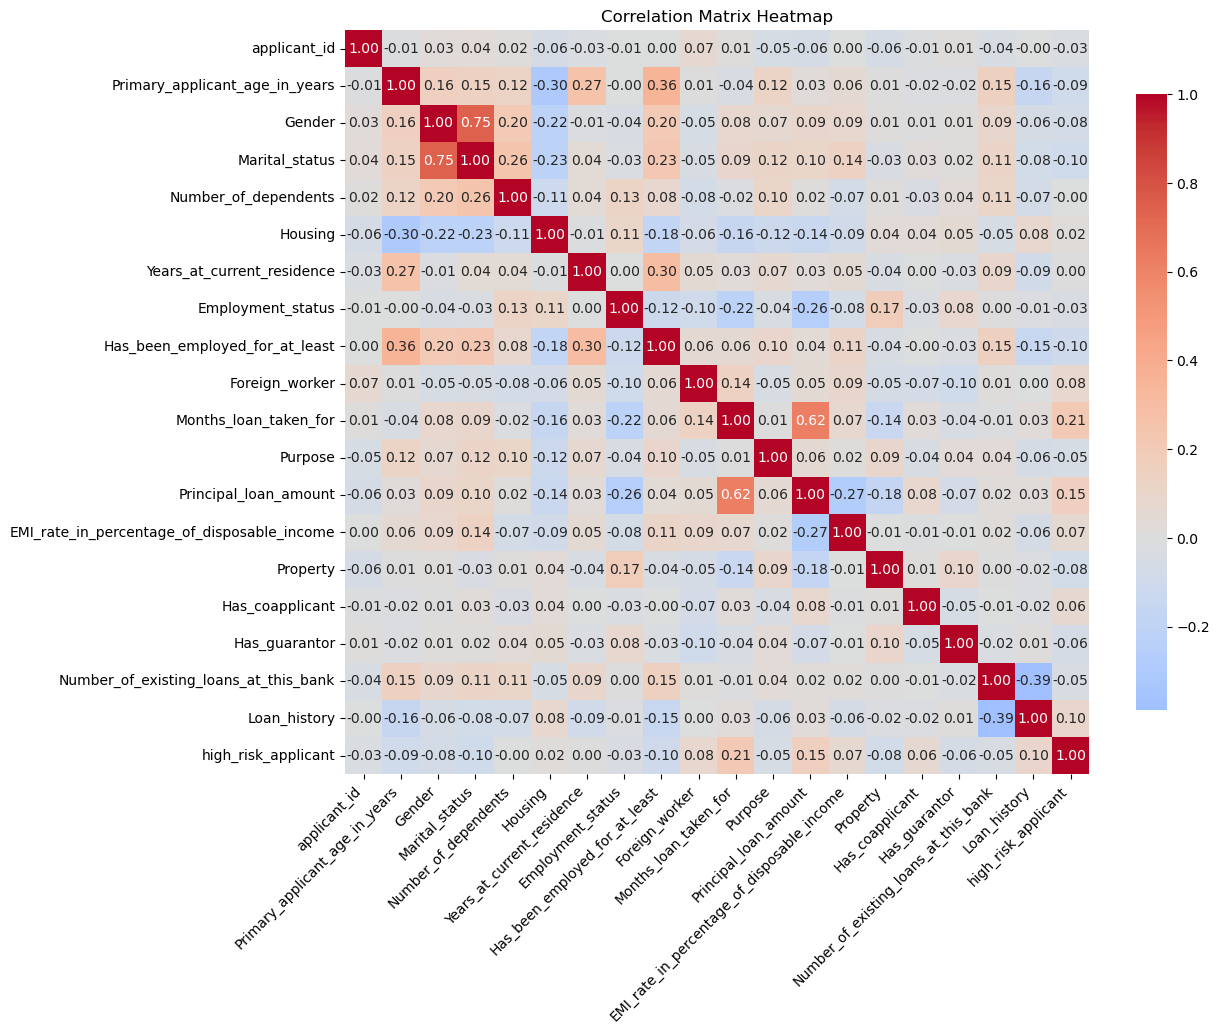

In [589]:
correlation_matrix = merged_df_imputed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, center=0,  fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title and labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Rotate y-axis labels

# Show the plot
plt.show()

# Train Test Split and Standard Scaler

In [590]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separating x and y 
X = merged_df_imputed.drop('high_risk_applicant', axis=1)  # Replace 'target_column' with your actual target column name
y = merged_df_imputed['high_risk_applicant']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are standardized

# Deep Neural Network

In [591]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(500, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    # layers.Dropout(0.5),
    layers.Dense(256, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    # layers.Dropout(0.5),
    layers.Dense(128, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    # layers.Dropout(0.5),
    layers.Dense(64, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    # layers.Dropout(0.5),
    layers.Dense(32, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dense(16, kernel_initializer='he_normal'),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define a callback to save the best weights
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='Best Weights/best_weights.keras',  # Path to save the best weights
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best weights
    mode='min',  # We want the minimum validation loss
    verbose=0
)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, 
    y_train, 
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,  # Number of epochs
    batch_size=10,  # Batch size
    callbacks=[checkpoint_callback, early_stopping],  # Add the checkpoint callback
    verbose=0
)

# After training, you can load the best weights if needed
model.load_weights('Best Weights/best_weights.keras')


In [592]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 500)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_68 (LeakyReLU)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_69 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_70 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_71 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_72 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_73 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,101 (2.08 MB)

 Trainable params: 182,033 (711.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364,068 (1.39 MB)

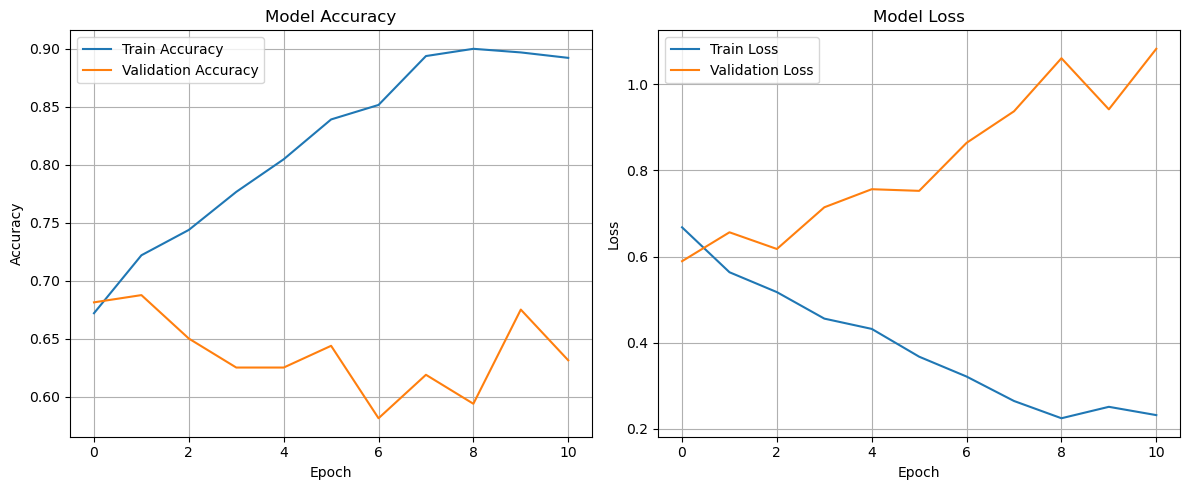

In [593]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [594]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.6016  
Test Loss: 0.6473, Test Accuracy: 0.6900


# XGBoost

In [596]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',
    'max_depth': 10,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = bst.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Test Accuracy of XGBoost model: {test_accuracy:.4f}')


Test Accuracy of XGBoost model: 0.7300


- Thresshold moving for XGBoost

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


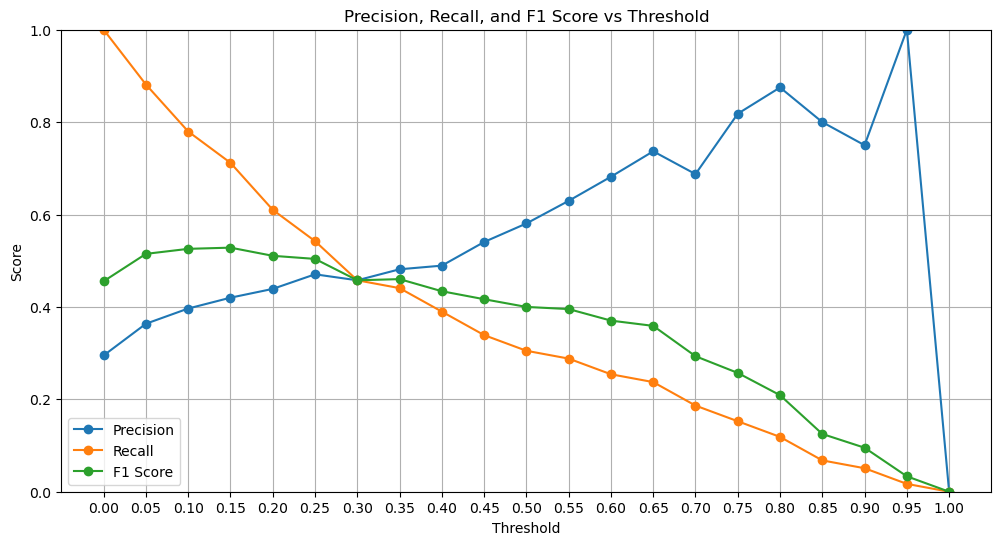

In [597]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predicted probabilities from the XGBoost model
y_scores = bst.predict(dtest)

# Define thresholds
thresholds = np.arange(0, 1.05, 0.05)

# Initialize lists to hold precision, recall, and F1 scores
precision_list = []
recall_list = []
f1_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_scores >= threshold).astype(int)  # Convert probabilities to binary using threshold
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1 Score', marker='o')

plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)  # Set x-ticks to be the thresholds
plt.ylim(0, 1)  # Set y-limit to [0, 1]
plt.grid()
plt.legend()
plt.show()


- since we want high recall, we choose thresshold to be 0.06

In [606]:
from sklearn.metrics import classification_report

# Assuming y_pred contains the predicted probabilities for the test set
# Convert predicted probabilities to binary predictions based on the threshold
threshold = 0.06
y_pred_threshold = (y_pred > threshold).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred_threshold)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.39      0.54       141
         1.0       0.37      0.85      0.51        59

    accuracy                           0.53       200
   macro avg       0.61      0.62      0.52       200
weighted avg       0.71      0.53      0.53       200

